In [1]:
import os
import json

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path
from IPython.display import display
%matplotlib inline

## Data Preparation

In [2]:
DATASET_DIR = os.path.abspath("dataset")

### Create a Pandas Dataframe of the Images

In [3]:
%cd $DATASET_DIR

dataset_path = Path(os.path.join("English", "Img", "GoodImg", "Bmp"))
data = []
class_names = {}
for class_dir in dataset_path.glob("Sample*"):
    class_ = int(class_dir.name.lstrip("Sample")) - 1
    if class_ not in class_names:
        if class_ < 10:
            name = str(class_)
        elif class_ < 36:
            name = chr(class_ + 55)
        else:
            name = chr(class_ + 61)
        class_names[class_] = name
    for p in class_dir.glob("*.png"):
        img = cv2.imread(str(p), cv2.IMREAD_COLOR)
        h, w = img.shape[:2]
        data.append({"class": class_, "path": str(p), "width": w, "height": h})
print(class_names)
df = pd.DataFrame(data)
df.head()

/mnt/d/Projects/stiki_malang_2022/Chars74k/dataset
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}


,class,path,width,height
0,0,English/Img/GoodImg/Bmp/Sample001/img001-00001...,103,96
1,0,English/Img/GoodImg/Bmp/Sample001/img001-00002...,99,98
2,0,English/Img/GoodImg/Bmp/Sample001/img001-00003...,86,122
3,0,English/Img/GoodImg/Bmp/Sample001/img001-00004...,310,471
4,0,English/Img/GoodImg/Bmp/Sample001/img001-00005...,75,128


In [4]:
df.describe()

,class,width,height
count,7705.000000,7705.000000,7705.000000
mean,25.926671,62.158339,87.173653
std,14.734662,54.133408,68.230884
min,0.000000,3.000000,9.000000
25%,14.000000,27.000000,41.000000
50%,24.000000,46.000000,68.000000
75%,35.000000,77.000000,107.000000
max,61.000000,536.000000,648.000000


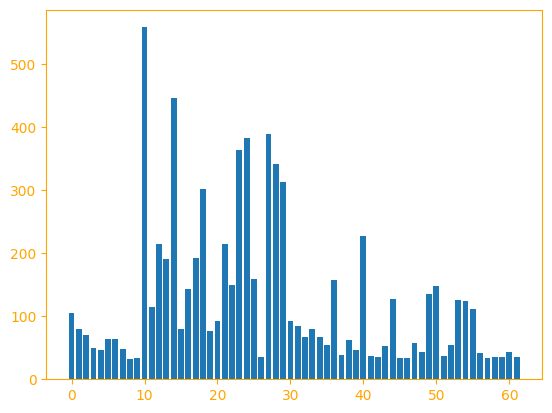

In [5]:
df_grp = df.groupby("class", as_index=False)
df_counts = df_grp.count()
with plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'orange', 'ytick.color':'orange'}):
    plt.bar(df_counts["class"], df_counts["path"])

In [6]:
train_dfs, val_dfs, test_dfs = [], [], []

for class_i, class_df in df_grp:
    train = class_df.sample(frac=0.8, random_state=200) #random state is a seed value
    test = class_df.drop(train.index)
    val = train.sample(frac=0.125, random_state=200) # 0.125*0.8 = 0.1
    train = train.drop(val.index)
    train_dfs.append(train)
    val_dfs.append(val)
    test_dfs.append(test)

train = pd.concat(train_dfs).sample(frac=1).reset_index(drop=True)
val = pd.concat(val_dfs).sample(frac=1).reset_index(drop=True)
test = pd.concat(test_dfs).sample(frac=1).reset_index(drop=True)
train.to_csv("train.csv", index=False)
val.to_csv("val.csv", index=False)
test.to_csv("test.csv", index=False)
with open("class_names.json", "w") as fp:
    json.dump(class_names, fp)